In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy as sp
from scipy import stats

In [4]:
data = pd.read_csv('/content/DATAF__1.CSV', sep=';')
print(data)

        BOARD  CHANNEL           TIMETAG  ENERGY  ENERGYSHORT FLAGS
0           0        0       29537840000     211          142   0x0
1           0        0       55748168000      13            8   0x0
2           0        0       65650420000      11            8   0x0
3           0        0      164163312000      47           41   0x0
4           0        0      226051716000      20           14   0x0
...       ...      ...               ...     ...          ...   ...
187409      0        0  3599536041584000      38           34   0x0
187410      0        0  3599540044172000      22           15   0x0
187411      0        0  3599540876644000      42           28   0x0
187412      0        0  3599749400092000     821          654   0x0
187413      0        0  3599762407040000    1338         1006   0x0

[187414 rows x 6 columns]


**For BnT :**

Takes approx 1 min

In [ ]:
timetags = data['TIMETAG'].values

counts = []
for timetag in timetags:
    shifted_TIMETAG = timetag + 200000000000
    count = np.sum((timetags >= timetag) & (timetags <= shifted_TIMETAG))
    counts.append(count)

Takes approx 3 mins

In [ ]:
counts = []
for index, row in data.iterrows():
    tmpT = row['TIMETAG']
    shifted_TIMETAG = tmpT + 200000000000
    count = ((data['TIMETAG'] >= tmpT) & (data['TIMETAG'] <= shifted_TIMETAG)).sum()
    counts.append(count)

In [ ]:
print(counts)

[6, 10, 9, 10, 13, 12, 12, 11, 10, 9, 8, 8, 7, 6, 5, 5, 12, 12, 12, 19, 19, 18, 17, 16, 15, 14, 13, 12, 12, 12, 13, 14, 14, 16, 15, 16, 15, 15, 14, 13, 12, 12, 11, 10, 9, 8, 7, 6, 5, 5, 4, 3, 3, 6, 9, 10, 9, 8, 7, 7, 8, 7, 6, 8, 7, 10, 10, 9, 8, 7, 6, 9, 10, 9, 8, 8, 13, 13, 12, 12, 13, 14, 13, 12, 11, 11, 11, 10, 9, 10, 13, 12, 11, 14, 13, 14, 14, 17, 16, 17, 16, 15, 14, 14, 13, 12, 11, 10, 9, 8, 8, 9, 8, 7, 12, 11, 10, 12, 12, 11, 11, 10, 10, 9, 8, 7, 6, 5, 4, 4, 5, 6, 9, 10, 9, 9, 8, 9, 8, 8, 10, 10, 9, 8, 9, 8, 7, 8, 7, 6, 6, 7, 6, 8, 7, 7, 7, 9, 9, 8, 7, 7, 8, 8, 7, 6, 6, 5, 4, 3, 4, 6, 9, 9, 9, 8, 7, 7, 8, 11, 10, 9, 8, 15, 14, 13, 12, 12, 11, 10, 14, 13, 12, 11, 10, 9, 8, 7, 8, 9, 8, 7, 6, 5, 8, 7, 8, 7, 7, 6, 5, 4, 3, 2, 2, 17, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 9, 11, 10, 9, 9, 9, 9, 8, 7, 9, 9, 8, 9, 8, 7, 7, 6, 5, 4, 9, 8, 9, 9, 9, 8, 7, 6, 5, 5, 4, 6, 5, 8, 8, 7, 8, 7, 7, 6, 5, 5, 5, 4, 9, 14, 14, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 8, 9, 8, 10, 9, 8,

**For Moments:**

In [ ]:
stats.moment(counts, moment = 2)

48.17670252662307

In [ ]:
M1 = np.average(counts)
M2 = np.std(counts)
M3 = np.var(counts)
print(M1, M2, M3)

12.771895376012464 6.9409439218756885 48.17670252662307


**For Y1, Y2, Y3:**

In [ ]:
Y1 = M1
Y2 = M2 - (pow(M1,2)/math.factorial(2))
Y3 = M3 - (M2*M1) + (pow(M1,3)/3)
print(Y1, Y2, Y3)

12.771895376012464 -74.6197118260286 653.9838009531259


**Y2F, Y3F:**

In [ ]:
Y2F = Y2/Y1
Y3F = Y3/Y1
print(Y2F, Y3F)

-5.842493195346371 51.20491373437067


**For T{1 - 512}:**

In [7]:
Y2F = []
Y3F = []
for i in range(1,513):
  i = i*1000000000
  timetags = data['TIMETAG'].values
  counts = []
  for timetag in timetags:
      shifted_TIMETAG = timetag + i
      count = np.sum((timetags >= timetag) & (timetags <= shifted_TIMETAG))
      counts.append(count)
  M1 = np.average(counts)
  M2 = np.std(counts)
  M3 = np.var(counts)
  Y1 = M1
  Y2 = M2 - (pow(M1,2)/math.factorial(2))
  Y3 = M3 - (M2*M1) + (pow(M1,3)/3)
  Y2F.append(Y2/Y1)
  Y3F.append(Y3/Y1)
  print(Y2F, Y3F)

[0.2916147116395354] [0.5569916230965043]
[0.2916147116395354, 0.4684070979691291] [0.5569916230965043, 1.049469966897219]
[0.2916147116395354, 0.4684070979691291, 0.5572482912237263] [0.5569916230965043, 1.049469966897219, 1.4681654436321252]
[0.2916147116395354, 0.4684070979691291, 0.5572482912237263, 0.5950532627474662] [0.5569916230965043, 1.049469966897219, 1.4681654436321252, 1.8004246009176637]


KeyboardInterrupt: 

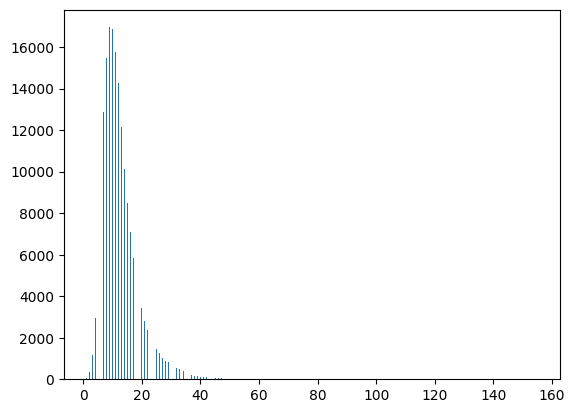

In [ ]:
_ = plt.hist(counts, bins='auto')

In [ ]:
cn = (data['TIMETAG'].groupby(pd.cut(data['TIMETAG'], np.arange(29537840000,3599762407040000,200000000000))).count()).values.tolist()